<a href="https://colab.research.google.com/github/AndromedaOMA/Advanced_Analytics_with_Apache_Spark---E.On_Software_Development/blob/main/Laboratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregătire mediu de lucru


In [ ]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://dlcdn.apache.org/spark/
!wget -q https://dlcdn.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar xf spark-3.4.4-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j
import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3"
import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as f
spark= SparkSession.builder.getOrCreate()
spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [73.0 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,836 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages 

---

# Înlănțuirea metodelor

## Java Builder

În programarea orientată obiect (OOP), design pattern-urile sunt șabloane pentru a rezolva probleme comune de
design a software-ului. Unul dintre cele mai cunoscute design pattern-uri este Builder, provenit din limbajul Java.

Implementarea șablonului și în Python:

In [ ]:
class CarBuilder:
  # Inițializarea builder-ului cu valori implicite potrivite.
  def __init__(self):
    self.car = {'wheels': 4, 'color': 'Silver'}
  # Funcțiile de setare a opțiunilor. Șablonul de builder se remarcă prin returnarea obiectul de self la metodele sale de setare. Asta permite înlănțuirea metodelor:
  def set_wheels(self, number):
    self.car['wheels'] = number
    return self
  def set_color(self, color):
    self.car['color'] = color
    return self
  # Funcțiile de finalizare, care returnează rezultatul
  def build(self):
    return self.car

## Java Builder – Utilizare in PySpark

Având la bază limbajul Scala, bazat pe Java, și fiind și un Framework bazat pe construcții de transformări, Spark, și
respectiv PySpark, se folosesc de acest șablonul de programare Builder în API-ul pe care îl oferă.

Am întâlnit până acum aceste construcții:

In [ ]:
from pyspark.sql import types as T
data_schema = T.StructType([
T.StructField('nume', T.StringType(), False),
T.StructField('varsta', T.IntegerType(), False),
T.StructField('ocupatie', T.StringType(), False),
T.StructField('vechime', T.IntegerType(), False),
T.StructField('inactiv', T.BooleanType(), True),
T.StructField('zona', T.StringType(), True),
T.StructField('extra', T.ArrayType(T.StringType()), True)
])

spark = SparkSession.builder.master('local[*]').config('spark.driver.memory', '3g').getOrCreate()
#       ---------------------======================================================______________
# Inițializarea builder-ului|       Apelarea funcțiilor de schimbare a           | Apelarea funcției de finalizare
# cu valori implicite       |            opțiunilor implicite.                   | care returnează obiectul
# potrivite alese de        |                                                    | constuit Spark/Data Frame
#         -----------===========================================================_______________________________
data_df = spark.read.format('csv').option('header', 'true').schema(data_schema).load('/path/to/folder/or/file')

---

# Comenzi de transformare

*Ce nu trebuie, nu facem!*

## Datele de test - Crearea Data Frame-urilor (createDataFrame)

Pentru a testa cod de Spark, în general, se folosesc liste mici cu date de test la crearea unui Data Frame, în loc să
citim datele. Când testam aplicații de Spark, putem folosi această metodă pentru scrierea de test.

➢ Funcția **createDataFrame** ne permite să specificăm doar numele coloanelor, fără a fi nevoie să
specificăm și tipul lor. Spark va trece prin data și va încerca să deducă automat tipul de date.

In [ ]:
data = [
['Vali', 23, 'Programator', 4, None, 'A' , ['3D Printer', 'XBOX']],
['Vlad', 34, 'Instalator', 11, None, 'B', ['EV']],
['Bea', 29, 'Reporter', 7, True, 'B', None]
]
data_df = spark.createDataFrame(data, schema=['nume', 'varsta', 'ocupatie', 'vechime', 'inactiv', 'zona', 'extra'])

## Proiectarea Datelor - Select

Data Frame-urile oferă și metode pentru proiectarea datelor, pe lângă cele de scriere, colectare și afișare, similare
cu interogările din bazele de date SQL, în același stil de apelare prin înlănțuire.

➢ Operația de Selecție – Păstrarea doar anumite coloane

In [ ]:
new_data_df = data_df.select('nume', 'varsta', 'extra')

❖ Un nou obiect de tip Data Frame este returnat care are doar coloanele nume, varsta și extra. Data Frame-ul
de la care a pornit proiecția va rămâne neschimbat.

In [ ]:
data_df.show()

+----+------+-----------+-------+-------+----+------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|
+----+------+-----------+-------+-------+----+------------------+
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|
|Vlad|    34| Instalator|     11|   NULL|   B|              [EV]|
| Bea|    29|   Reporter|      7|   true|   B|              NULL|
+----+------+-----------+-------+-------+----+------------------+



In [ ]:
new_data_df.show()

+----+------+------------------+
|nume|varsta|             extra|
+----+------+------------------+
|Vali|    23|[3D Printer, XBOX]|
|Vlad|    34|              [EV]|
| Bea|    29|              NULL|
+----+------+------------------+



## Proiectarea Datelor - Ștergere (drop)

De multe ori se întâmplă să lucrăm cu date care conțin foarte multe coloane, și devine inpractic să le selectăm. În
loc de selecția coloanelor pe care dorim să le păstrăm, putem scoate coloanele de care nu avem nevoie.

➢ Operația de Ștergere – Ștergere a coloanelor

In [ ]:
new_data_df = data_df.drop('varsta', 'zona', 'extra')

❖ Un nou obiect de tip Data Frame este returnat care nu mai are coloanele varsta, concediu și
extra. Data Frame-ul de la care a pornit proiecția va rămâne neschimbat.

In [ ]:
data_df.show()

+----+------+-----------+-------+-------+----+------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|
+----+------+-----------+-------+-------+----+------------------+
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|
|Vlad|    34| Instalator|     11|   NULL|   B|              [EV]|
| Bea|    29|   Reporter|      7|   true|   B|              NULL|
+----+------+-----------+-------+-------+----+------------------+



In [ ]:
new_data_df.show()

+----+-----------+-------+-------+
|nume|   ocupatie|vechime|inactiv|
+----+-----------+-------+-------+
|Vali|Programator|      4|   NULL|
|Vlad| Instalator|     11|   NULL|
| Bea|   Reporter|      7|   true|
+----+-----------+-------+-------+



## Proiectarea Datelor – Redenumirea Coloanelor (withColumnRenamed)

Numele coloanele din date adesea nu se potrivesc cu metodologia noastă de a numi coloanele, de exemplu
conțin caractere neobișnuite sau sunt în altă limbă. Putem să redenumim aceste coloane pentru a le standardiza.

➢ Operația de Redenumire – Redenumire a coloanelor

In [ ]:
new_data_df = data_df.withColumnRenamed('ocupatie', 'job')

❖ Un nou obiect de tip Data Frame este returnat care nu mai are coloana post, dar are o nouă coloană job cu
aceleași valori. Data Frame-ul de la care a pornit proiecția va rămâne neschimbat.

In [ ]:
data_df.printSchema()

root
 |-- nume: string (nullable = true)
 |-- varsta: long (nullable = true)
 |-- ocupatie: string (nullable = true)
 |-- vechime: long (nullable = true)
 |-- inactiv: boolean (nullable = true)
 |-- zona: string (nullable = true)
 |-- extra: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [ ]:
new_data_df.printSchema()

root
 |-- nume: string (nullable = true)
 |-- varsta: long (nullable = true)
 |-- job: string (nullable = true)
 |-- vechime: long (nullable = true)
 |-- inactiv: boolean (nullable = true)
 |-- zona: string (nullable = true)
 |-- extra: array (nullable = true)
 |    |-- element: string (containsNull = true)



## Data Frame – View și Plan Logic/Fizic de Execuție

Un Data Frame este defapt un „View”, similar cu cel din bazele de date SQL, asupra datelor. Într-un astfel de obiect, se reține doar de unde provin datele și transformările care trebuie efectuate, numite Planul Logic de Execuție.

**Planul Logic de Execuție** (O vedere internă a unui Data Frame):
  1. Citirea Datelor din /path/to/course/data/folder
  2. Ștergerea Coloanelor varsta, zona și extra
  3. Redenumirea Coloanei ocupatie în job


Calculele vor fi efectuate doar în momentul accesării acestui „View”, adică atunci când dorim să le scriem, afișăm sau colectăm. În acel moment, mașina Master va trimite „comenzile”, planul de Execuție Fizic al Data Frame-ului, la executori, care îl vor efectua. (Planul Fizic de Execuție -> Master Machine -> Executor Machines)

**Planul Fizic de Execuție** (O vedere internă a unui Data Frame):
  1. Citirea Datelor din /path/to/course/data/folder
  2. Ștergerea Coloanelor varsta, zona și extra
  3. Redenumirea Coloanei ocupatie în job
  4. Scrieți datele la /path/to/save/folder

## Data Frame – Imutabilitate

Întrucât un „View”, Data Frame, nu poate fi modificat, toate funcțiile de transformare din PySpark întotdeauna vor returna un „View” nou, adică un nou Data Frame, clonă a celui anterior dar la care se adaugă noua transformare. (Data Frame-ul inițial -> Data Frame-ul după o operație de transformare)

**Data Frame-ul inițial**:
1. Citirea Datelor din /path/to/course/data/folder
2. Ștergerea Coloanelor varsta, zona și extra

**Data Frame-ul după o operație de transformare**:
1. Citirea Datelor din /path/to/course/data/folder
2. Ștergerea Coloanelor varsta, zona și extra
3. Redenumirea Coloanei *ocupatie* în *job*

OBS: Defapt, nici o funcție din Spark nu permite modificarea unui obiect de tip Data Frame. Odată creat, un obiect de Data Frame nu mai poate fi modificat! Această proprietate se numește în programare proprietatea de imutabilitate.

## Planul de Execuție - Optimizări (Catalyst)

O funcționalitate de baza din Spark SQL este procesul de optimizare a operațiilor, Optimizatorul **Catalyst**. El preia lanțul de comenzi dintr-un Data Frame și încearcă să aplice optimizări pertinente care pot îmbunătății timpii de execuție și memoria folosită de executori.

final_data_df - **Planul Logic de Execuție** (O vedere internă a unui Data Frame):
  1. Citirea Datelor din /path/to/course/data/folder
  2. Ștergerea Coloanelor *varsta*, *zona* și *extra*
  3. Redenumirea Coloanei *ocupatie* în *job*

final_data_df - **Planul Logic Optimizat** (O vedere internă a unui Data Frame):
  1. Citirea Coloanelor *nume*, *ocupatie*, *vechime*, *concediu* din /path/to/course/data/folder
  2. Redenumirea Coloanei *ocupatie* în *job*

OBS: Optimizatorul Calatyst este unul dintre principalele motive pentru care Spark este atât de rapid și ușor de utilizat.

### Opimizatorul Catalyst

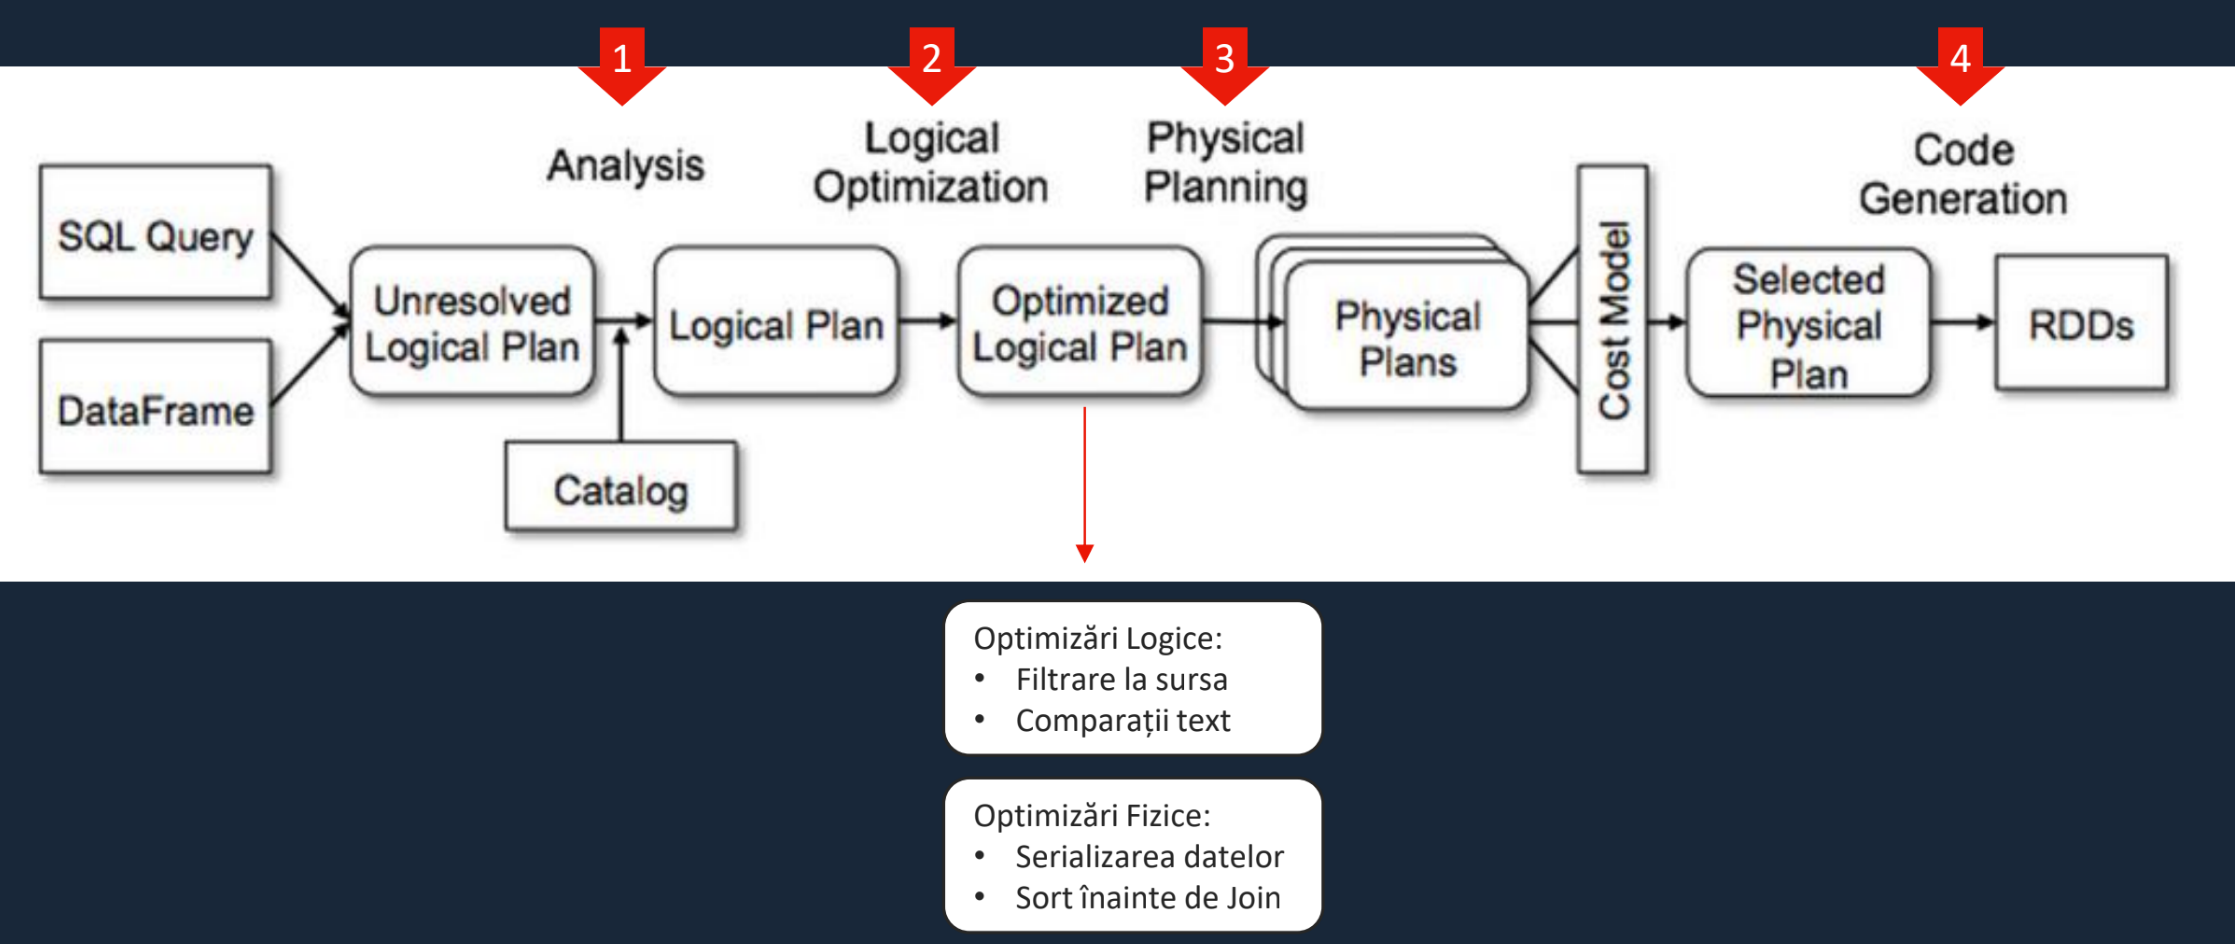

## Data Frame – Afișarea Planului de Execuție

De multe ori ne găsim în situația în care este nevoie să depanăm operațiile de transformare a datelor. Așadar,
Spark ofertă metode pentru afișarea comenzilor și operațiilor care trebuie efectuate pe date.

➢ Pentru a printa toate planurile de execuție, logice și fizice, la consolă, folosim:

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

data_df = spark.read.format('json').load('/content/drive/MyDrive/FP-EON/practice/IN/json')
data_without_personal_columns_df = data_df.drop('varsta', 'extra')
final_data_df = data_without_personal_columns_df.withColumnRenamed('post', 'job')
final_data_df.show()
print('==========' * 5)
final_data_df.explain('extended')

+-------+-----------+--------------------+-------+
|inactiv|       nume|            ocupatie|vechime|
+-------+-----------+--------------------+-------+
|   NULL|     Andrei|Specialist marketing|     13|
|   NULL|  Alexandru|      Specialist HR |      8|
|   NULL|     Adrian|       Inginer civil|     23|
|   NULL|      Alin |   Vânzător  retail |      2|
|   NULL|      Anton|     Manager proiect|     15|
|   NULL|        Ana|  Muncitor alimentar|      9|
|  false|     Bogdan|           Farmacist|     32|
|   true|  Cătălin  |        Medic primar|      0|
|   NULL|     Cosmin|           Farmacist|     31|
|  false|   Cristian|    Asistent  social|     21|
|   NULL|    Gabriel|     Asistent social|     21|
|  false|     George|     Agent imobiliar|     25|
|   NULL|   Gheorghe|      Specialist HR |      8|
|   NULL|    Grigore|    Asistent  social|     21|
|   NULL|      Horia|           Arhitect |     18|
|   NULL|      Ilie |     Vânzător retail|      2|
|   NULL|       Ion |     Vânză

Mai multe detalii găsiți la https://spark.apache.org/docs/latest/sql-ref-syntax-qry-explain.html

## Înlănțuirea Comenzilor

Întrucât toate funcțiile de transformare din PySpark vor returna un obiect nou de tip Data Frame, asta ne permite
foarte ușor să înlănțuim codul de transformare a datelor.

➢ Operația de Ștergere și Operația de Redenumire a Coloanelor scrise separat

In [ ]:
data_without_personal_columns_df = data_df.drop('varsta', 'zona', 'extra')
final_data_df = data_without_personal_columns_df .withColumnRenamed('ocupatie', 'job')
final_data_df.show()

+-------+-----------+--------------------+-------+
|inactiv|       nume|                 job|vechime|
+-------+-----------+--------------------+-------+
|   NULL|     Andrei|Specialist marketing|     13|
|   NULL|  Alexandru|      Specialist HR |      8|
|   NULL|     Adrian|       Inginer civil|     23|
|   NULL|      Alin |   Vânzător  retail |      2|
|   NULL|      Anton|     Manager proiect|     15|
|   NULL|        Ana|  Muncitor alimentar|      9|
|  false|     Bogdan|           Farmacist|     32|
|   true|  Cătălin  |        Medic primar|      0|
|   NULL|     Cosmin|           Farmacist|     31|
|  false|   Cristian|    Asistent  social|     21|
|   NULL|    Gabriel|     Asistent social|     21|
|  false|     George|     Agent imobiliar|     25|
|   NULL|   Gheorghe|      Specialist HR |      8|
|   NULL|    Grigore|    Asistent  social|     21|
|   NULL|      Horia|           Arhitect |     18|
|   NULL|      Ilie |     Vânzător retail|      2|
|   NULL|       Ion |     Vânză

➢ Operația de Ștergere și Operația de Redenumire a Coloanelor scrise împreună.

In [ ]:
final_data_df = (
data_df
.drop('varsta', 'zona', 'extra')
.withColumnRenamed('ocupatie', 'job')
)
final_data_df.show()

+-------+-----------+--------------------+-------+
|inactiv|       nume|                 job|vechime|
+-------+-----------+--------------------+-------+
|   NULL|     Andrei|Specialist marketing|     13|
|   NULL|  Alexandru|      Specialist HR |      8|
|   NULL|     Adrian|       Inginer civil|     23|
|   NULL|      Alin |   Vânzător  retail |      2|
|   NULL|      Anton|     Manager proiect|     15|
|   NULL|        Ana|  Muncitor alimentar|      9|
|  false|     Bogdan|           Farmacist|     32|
|   true|  Cătălin  |        Medic primar|      0|
|   NULL|     Cosmin|           Farmacist|     31|
|  false|   Cristian|    Asistent  social|     21|
|   NULL|    Gabriel|     Asistent social|     21|
|  false|     George|     Agent imobiliar|     25|
|   NULL|   Gheorghe|      Specialist HR |      8|
|   NULL|    Grigore|    Asistent  social|     21|
|   NULL|      Horia|           Arhitect |     18|
|   NULL|      Ilie |     Vânzător retail|      2|
|   NULL|       Ion |     Vânză

---

# Metode și expresii de transformare

Încă nu ai curățat datele?

## Comenzi de transformare, filtrare și ordonare

Spark poate transmite și comenzi mai complexe, comenzi de transformare, filtrare sau ordonare, către executori.
Aceste comenzi permit calcularea unor noi valori din datele existente prin utilizarea de expresii matematice,
asemenea bazelor de date sau formulelor de Excel.

**Data Frame**:
1. Citirea Datelor din /path/to/course/data/folder
2. Adăugarea Coloanei varsta_de_angajare = varsta - vechime
(Comenzile de transformare: pe baza unei expresii se calculează coloane noi sau se le înlocuiesc cele existente.)
3. Păstrarea Datelor îndeplinesc condiția varsta < 30
(Comenzile de filtrare și ordonare: pe baza unei expresii se decide care date se păstrează și ordinea lor.)

## Column - Expresii de calcul

Pentru a reprezenta și construi expresii de calcul programatic, care vor fi adăugate ca noi coloane sau vor înlocui
coloanele existente, PySpark folosește o clasă specială de Python cu un nume intuitiv, numită Column. Ea reține
doar „formula” care trebuie efectuată, similar cum un Data Frame reține doar lanțul de comenzi, pentru noile
coloane.

PySpark oferă funcții speciale pentru a construi astfel de expresii. Toate se află în același modul de Python.

In [ ]:
from pyspark.sql import functions as f

➢ O expresie ce reprezintă o valoare constantă


In [ ]:
expr = f.lit(130)
print(expr)

Column<'130'>


➢ O expresie ce reprezintă valoarea unei o coloane

In [ ]:
expr = f.col('varsta')
print(expr)

Column<'varsta'>


OBS: Dacă **NU** sunt transformări/funcții utlizate, atunci numele coloanelor pot fi apelate ca strings.

In [ ]:
final_data_df = (
data_df
.select('varsta', 'zona', 'extra')
)

Cand aplicam transformari/functii, atunci este necesara:
* Apecificarea ‘column type’ utilizand *col*
* Convertirea valorilor constante in ‘column type’ utilizand *lit*



In [ ]:
from pyspark.sql.functions import col, lit, upper, concat

path_parquet = "/content/drive/MyDrive/E.on/E.on_Data/Data/practice/parquet"
data_df_parquet = spark.read.format('parquet').load(path_parquet)
data_df_parquet.show()

final_data_df_1 = (
data_df_parquet
.select(upper(col('nume')))
)
final_data_df_1.show()

final_data_df_2 = (
data_df_parquet
.select(concat(col('vechime'), lit(' ani') ) )
)
final_data_df_2.show()

+------------+------+--------------------+-------+-------+--------------------+
|        nume|varsta|            ocupatie|vechime|inactiv|               extra|
+------------+------+--------------------+-------+-------+--------------------+
|       Daria|    33|   Inginer  mecanic |      7|   NULL|                [EV]|
|     Delia  |    20|        Medic primar|      0|   true|                NULL|
|       Diana|    45|   Asistent  social |     23|   NULL|[XBOX, 3D Printer...|
|       Doina|    37|Specialist  marke...|     11|   NULL|          [WII, PS5]|
|      Elena |    25|            Contabil|      1|   NULL|                NULL|
|     Eliza  |    23|          Instalator|      0|   NULL|                NULL|
|     Emilia |    25|            Contabil|      1|   NULL|                NULL|
|   Eugenia  |    24|        Programator |      1|   NULL|                NULL|
|     Felicia|    34|      Specialist  HR|      8|   NULL|          [WII, PS5]|
|    Florina |    28|               Șofe

## Column - Operatori

Pentru a construi formule mai complexe de calcul, obiectul Column oferă posibilitatea de a folosi operatorii comuni
din Python pentru operații aritmetice și booleene și de comparare.

➢ Operatori elementari: +, -, * , /, ~, **, %, //


➢ Operatori de comparare:
<, >, <=, >=, ==, !=

❖ Toți operatorii permit și folosirea directă a valorilor în operații fără a fi nevoie de funcția **lit**

In [ ]:
print((f.col('varsta') * f.lit(2) + f.col('vechime') - f.lit(3)) / f.lit(2) < 40)

Column<'(((((varsta * 2) + vechime) - 3) / 2) < 40)'>


## Column - Funcții

Pentru a efectua operații pe caractere sau liste și alte structuri complexe, PySpark oferă funcții gata implementate.

➢ Funcțiile pot accepta un număr variabil de parametri, de la zero la doi sau mai mulți, în funcție de specificațiile ei.

contains, trim:

In [ ]:
print(f.contains(f.trim(f.col('nume')), f.lit('a')))

Column<'contains(trim(nume), a)'>


➢ Unele funcții acceptă doar parametrii de tip Column, altele necesită parametrii cu valori constante.

* cirrent_date, date_trunc:

In [ ]:
print(f.date_trunc('DAY', f.current_date()) == '2024-01-01')

Column<'(date_trunc(DAY, current_date()) = 2024-01-01)'>


* array_remove, size:

In [ ]:
print(f.size(f.array_remove(f.col('extra'), 'EV')) > 0)

Column<'(size(array_remove(extra, EV)) > 0)'>


OBS: Funcțiile și detaliile lor găsiți la https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/functions.html

## Column - Expresii SQL

Funcțiile oferite de Spark SQL sunt similare cu cele din bazele de date SQL. De asemenea, se pot parsa direct
expresii în stil SQL care folosesc doar funcții disponibile în Spark SQL într-o expresie de tip Column.

➢ Metoda de parsare a unei expresii tip SQL dintr-un șir de caractere de Python. (Funcția va returna un obiect de tip Column pentru expresia de calcul parsată din șirul de caractere)

În acest exemplu, Spark expresia va concatena șirul "in vasta de” cu valoarea coloanei varsta și șirul ”ani”.

In [ ]:
expr = f.expr('concat("in varsta de ", varsta, " ani")')
print(expr)

Column<'concat(in varsta de , varsta,  ani)'>


## Transformarea Datelor (WithColumn)

Data Frame-urile oferă și metode pentru transformarea datelor, pe lângă cele de proiectare, scriere, colectare și
afișare în același stil de apelare prin înlănțuire. Aceste metode se folosesc de expresiile de calcul.

➢ Operația de Transformare – Adăugarea sau Înlocuirea unui coloane (Un nou obiect de tip Data Frame este returnat care are adăugată sau actualizată coloana text cu rezultatul evaluării expresiei. Expresia se analizează și tipul coloanei este dedus automat.)

In [ ]:
new_data_df = data_df.withColumn('text', f.expr('concat("in varsta de ", varsta, " ani")'))
new_data_df.show()

+----+------+-----------+-------+-------+----+------------------+-------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|               text|
+----+------+-----------+-------+-------+----+------------------+-------------------+
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|in varsta de 23 ani|
|Vlad|    34| Instalator|     11|   NULL|   B|              [EV]|in varsta de 34 ani|
| Bea|    29|   Reporter|      7|   true|   B|              NULL|in varsta de 29 ani|
+----+------+-----------+-------+-------+----+------------------+-------------------+



In [ ]:
new_data_df = data_df.withColumn('text', f.concat(f.lit('in varsta de '), f.col('varsta'), f.lit(' ani')))
new_data_df.show()

+----+------+-----------+-------+-------+----+------------------+-------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|               text|
+----+------+-----------+-------+-------+----+------------------+-------------------+
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|in varsta de 23 ani|
|Vlad|    34| Instalator|     11|   NULL|   B|              [EV]|in varsta de 34 ani|
| Bea|    29|   Reporter|      7|   true|   B|              NULL|in varsta de 29 ani|
+----+------+-----------+-------+-------+----+------------------+-------------------+



## Column - Tipuri de Date

Spark SQL nu poate determina tipul de date al obiectelor Column fără să cunoască tipurile valorilor implicate în
expresie. Dar când expresia este integrată într-un Data Frame, ea este analizată și tipul de date este dedus.

➢ Obiectul Column dispune adițional de o metodă pentru a converti expresiile într-un tip de date specificat
pentru cazul în care dorim să convertim rezultatul expresiei într-un alt tip de date. (Similar cu metodele din Data Frame, un nou obiect de tip Column este returnat cu o nouă expresie care
convertește rezultatul expresiei anterioare la tipul de date specificat.)

In [ ]:
expr = (f.col('varsta') + f.lit(1)).cast('string')
print(expr)

Column<'CAST((varsta + 1) AS STRING)'>


## Column - Nume

Fiecare obiect de tip Column vine automat cu un nume atribuit, care, prin implicit, este identic cu textul expresiei
sale. Câteva funcții și metode din Spark utilizează acest nume, dar sunt relativ puține.

Obiectul Column dispune adițional și de o metodă pentru a seta numele obiectului Column explicit.Similar cu metodele din Data Frame, un nou obiect de tip Column este returnat cu o nouă expresie care
setează un nume expresiei precedente, similar cu metoda AS din SQL.

In [ ]:
expr = f.expr('concat("in varsta de ", varsta, " ani")').alias('text_varsta')
print(expr)

Column<'concat(in varsta de , varsta,  ani) AS text_varsta'>


OBS: Sunt relativ puține metode care se folosesc de numele expresiei. Una dintre ele este metoda struct care
se folosește de numele expresiei în crearea structurii. Metoda withColumn ignoră complet numele. Numele expresiei nu se păstrează dacă o folosim pentru a crea alte expresii.

## Column - Condiții

Similar cu Data Frame-urile, metodele obiectului de tip Column returnează o coloană nouă. Așadar aceste
metode pot fi înlănțuite. Metoda de scriere a condițiilor IF-ELSE se folosește de acest lucru.

➢ Condiții în lanț de IF-ELSE:

In [ ]:
print( f.when(f.col('varsta') < 25, f.lit('I')).when(f.col('varsta') < 32, f.lit('II')).otherwise(f.lit('III')) )

Column<'CASE WHEN (varsta < 25) THEN I WHEN (varsta < 32) THEN II ELSE III END'>


OBS: Funcțiile when și otherwise ale tipului Column vor genera o eroare dacă sunt apelate fără a apela mai întâi
funcția de calcul when din modulul de funcții. Dacă otherwise este omis, atunci expresia va rezulta în valoarea „NULL” dacă condițiile de when nu sunt
îndeplinite. Evident, la finalul lanțului putem adăuga și funcțiile cast și alias dacă este necesar.

## Transformarea Datelor - Select

Similar cu interogările din bazele de date SQL, se pot efectua și transformări de date în funcția de select.

➢ Operația de Selecție – Selecție a coloanelor. (Un nou obiect Data Frame este returnat care include doar coloanele specificate. Numele expresiilor este
utilizat ca denumire pentru coloanele respective. Expresiile se analizează și tipul lor este dedus)

In [ ]:
new_data_df = data_df.select(
'nume', 'extra', f.col('varsta') - f.col('vechime'),
f.concat(f.lit('in varsta de '), f.col('varsta'), f.lit(' ani')).alias('text')
)
new_data_df.show()

+----+------------------+------------------+-------------------+
|nume|             extra|(varsta - vechime)|               text|
+----+------------------+------------------+-------------------+
|Vali|[3D Printer, XBOX]|                19|in varsta de 23 ani|
|Vlad|              [EV]|                23|in varsta de 34 ani|
| Bea|              NULL|                22|in varsta de 29 ani|
+----+------------------+------------------+-------------------+



---

# Metode de filtrare și ordonare

## Filtrarea Datelor – Filter

Data Frame-urile oferă și metode pentru filtrarea datelor, pe lângă cele de transformare, scriere, colectare și
afișare, similare cu interogările din bazele de date SQL, în același stil de apelare prin înlănțuire.

➢ Operația de Filtrare – Păstrarea datelor pe baza unei condiții. (Un nou obiect Data Frame este returnat care include doar datele ce îndeplinesc condiția specificată, valoare
expresiei să fie diferită de False sau NULL. Metoda acceptă și expresii direct în format text.)

In [ ]:
new_data_df = data_df.filter('varsta < 30')
new_data_df.show()

new_data_df = data_df.filter(f.col('varsta') < 30)
new_data_df.show()

+----+------+-----------+-------+-------+----+------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|
+----+------+-----------+-------+-------+----+------------------+
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|
| Bea|    29|   Reporter|      7|   true|   B|              NULL|
+----+------+-----------+-------+-------+----+------------------+

+----+------+-----------+-------+-------+----+------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|
+----+------+-----------+-------+-------+----+------------------+
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|
| Bea|    29|   Reporter|      7|   true|   B|              NULL|
+----+------+-----------+-------+-------+----+------------------+



## Ordonarea Datelor – Sort

Implicit, datele sunt sortate după ordinea în care apar ele în fișiere sau din obiectele de Python furnizate. Spark
permite schimbarea acestei ordine și ofertă funcții speciale pentru setarea ei.

➢ Operația de Sortare – Ordonarea datelor după unul sau mai multe criterii de ordonare. (Este returnat un nou obiect Data Frame ordonat după nume crescător, apoi vârstă descrescător la egalitate.
Pot fi specificare oricâte criterii de sortare. În modulul de funcții se găsesc mai multe reguli de ordonare.)

In [ ]:
new_data_df = data_df.sort('nume', f.desc(f.col('varsta')))
new_data_df.show()

+----+------+-----------+-------+-------+----+------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|
+----+------+-----------+-------+-------+----+------------------+
| Bea|    29|   Reporter|      7|   true|   B|              NULL|
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|
|Vlad|    34| Instalator|     11|   NULL|   B|              [EV]|
+----+------+-----------+-------+-------+----+------------------+



## Limitarea Datelor – Limit

Pentru depanare, când se dorește testarea pe puține date, Spark prezintă și o metodă de a limita datele. Aceasta
permite selecția rapidă a unui număr fix de date, fiind mai eficientă decât filtrarea, care procesează întregul set.

➢ Operația de Limitare – Limitarea numărului de rânduri

In [ ]:
limited_data_df = data_df.limit(2)
limited_data_df.show()

+----+------+-----------+-------+-------+----+------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|
+----+------+-----------+-------+-------+----+------------------+
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|
|Vlad|    34| Instalator|     11|   NULL|   B|              [EV]|
+----+------+-----------+-------+-------+----+------------------+



Adesea metoda este folosită pentru depanare și analiză sau înainte de colectare.

In [ ]:
new_data_df = data_df.sort(f.desc('vechime')).limit(2)
new_data_df.show()

+----+------+----------+-------+-------+----+-----+
|nume|varsta|  ocupatie|vechime|inactiv|zona|extra|
+----+------+----------+-------+-------+----+-----+
|Vlad|    34|Instalator|     11|   NULL|   B| [EV]|
| Bea|    29|  Reporter|      7|   true|   B| NULL|
+----+------+----------+-------+-------+----+-----+



---

# Reutilizarea Operațiilor

Work smart, not hard

## Reutilizarea Operațiilor - Lanțuri comune de comenzi

De multe ori se întâmplă ca un lanț de comenzi, e.g. proiecții, transformări sau filtrări, să trebuiască refolosit.

**data_df**:
1. Citirea Datelor din /path/to/course/data/folder
2. Adăugarea Coloanei varsta_contractare = varsta - vechime



In [ ]:
data_df = data_df.withColumn('varsta_contractare', f.col('varsta') - f.col('vechime'))

**data_df1**:
1. Citirea Datelor din /path/to/course/data/folder
2. Adăugarea Coloanei varsta_contractare = varsta - vechime
3. Păstrarea Datelor îndeplinesc condiția varsta_contractare < 22



In [ ]:
data_df1 = data_df.filter('varsta_contractare < 22')

**data_df2**:
1. Citirea Datelor din /path/to/course/data/folder
2. Adăugarea Coloanei varsta_contractare = varsta - vechime
3. Păstrarea Datelor îndeplinesc condiția varsta_contractare >= 22



In [ ]:
data_df2 = data_df.filter('varsta_contractare >= 22')

**Atenție!**

La fiecare rulare, toate operațiile vor fi re-executate, ceea ce este ineficient pentru transformări complexe. Situația
apare și dacă re-scriem același Data Frame, precum și atunci când Data Frame-urile au un istoric de comenzi
comun.

## Reutilizarea Operațiilor – Cache

Pentru a reutiliza datele procesate de un lanț de comenzi, Spark oferă metode de a salva datele temporar pe
executori, fără a fi nevoie de a întrerupe lanțul prin salvarea lor manuală de către dezvoltator.

➢ Operația de Caching – Stocarea datelor în memorie și surplusul pe disk până la închiderea sesiunii de Spark. (Un nou obiect Data Frame este returnat cu o operație de salvare a datelor adăugată în lanțul de comenzi.)

In [ ]:
cached_data_df = data_df.cache()
cached_data_df.show()

+----+------+-----------+-------+-------+----+------------------+------------------+
|nume|varsta|   ocupatie|vechime|inactiv|zona|             extra|varsta_contractare|
+----+------+-----------+-------+-------+----+------------------+------------------+
|Vali|    23|Programator|      4|   NULL|   A|[3D Printer, XBOX]|                19|
|Vlad|    34| Instalator|     11|   NULL|   B|              [EV]|                23|
| Bea|    29|   Reporter|      7|   true|   B|              NULL|                22|
+----+------+-----------+-------+-------+----+------------------+------------------+



OBS: La prima execuție a comenzilor unui Data Frame care continuă lanțul din cached_data_df, datele se salvează
în memoria executorilor și surplusul pe disk. La o altă rulare, fie a aceluiași Data Frame, fie a unui alt Data
Frame derivat, datele vor fi refolosite și operațiile de dinainte de cache nu vor mai fi executate.

In [ ]:
new_data_df.explain('extended')

== Parsed Logical Plan ==
GlobalLimit 2
+- LocalLimit 2
   +- Sort [vechime#72L DESC NULLS LAST], true
      +- LogicalRDD [nume#69, varsta#70L, ocupatie#71, vechime#72L, inactiv#73, zona#74, extra#75], false

== Analyzed Logical Plan ==
nume: string, varsta: bigint, ocupatie: string, vechime: bigint, inactiv: boolean, zona: string, extra: array<string>
GlobalLimit 2
+- LocalLimit 2
   +- Sort [vechime#72L DESC NULLS LAST], true
      +- LogicalRDD [nume#69, varsta#70L, ocupatie#71, vechime#72L, inactiv#73, zona#74, extra#75], false

== Optimized Logical Plan ==
GlobalLimit 2
+- LocalLimit 2
   +- Sort [vechime#72L DESC NULLS LAST], true
      +- LogicalRDD [nume#69, varsta#70L, ocupatie#71, vechime#72L, inactiv#73, zona#74, extra#75], false

== Physical Plan ==
TakeOrderedAndProject(limit=2, orderBy=[vechime#72L DESC NULLS LAST], output=[nume#69,varsta#70L,ocupatie#71,vechime#72L,inactiv#73,zona#74,extra#75])
+- *(1) Scan ExistingRDD[nume#69,varsta#70L,ocupatie#71,vechime#72L,inactiv#

## Reutilizarea Operațiilor – Persist

Spark pune la dispoziție și o metodă mai avansată de a salva datele temporar pe executori prin care se poate
alege și modalitatea de salvare a datelor temporar.

➢ Operația de Persistență – Stocarea datelor după specificația furnizată până la închiderea sesiunii de Spark. (Un nou obiect Data Frame este returnat cu o operație de salvare a datelor, după opțiunile specificate,
adăugată în lanțul de comenzi. Metoda se comportă identic cu metoda cache, însă acest caz specific, DOAR IN
MEMORIE)

In [ ]:
from pyspark.storagelevel import StorageLevel
cached_data_df = data_df.persist(StorageLevel.MEMORY_ONLY)

Metoda de cache utilizează această metodă în spate, specificând opțiunea de memorie și disk.

In [ ]:
new_data_df.explain('extended')

== Parsed Logical Plan ==
GlobalLimit 2
+- LocalLimit 2
   +- Sort [vechime#72L DESC NULLS LAST], true
      +- LogicalRDD [nume#69, varsta#70L, ocupatie#71, vechime#72L, inactiv#73, zona#74, extra#75], false

== Analyzed Logical Plan ==
nume: string, varsta: bigint, ocupatie: string, vechime: bigint, inactiv: boolean, zona: string, extra: array<string>
GlobalLimit 2
+- LocalLimit 2
   +- Sort [vechime#72L DESC NULLS LAST], true
      +- LogicalRDD [nume#69, varsta#70L, ocupatie#71, vechime#72L, inactiv#73, zona#74, extra#75], false

== Optimized Logical Plan ==
GlobalLimit 2
+- LocalLimit 2
   +- Sort [vechime#72L DESC NULLS LAST], true
      +- LogicalRDD [nume#69, varsta#70L, ocupatie#71, vechime#72L, inactiv#73, zona#74, extra#75], false

== Physical Plan ==
TakeOrderedAndProject(limit=2, orderBy=[vechime#72L DESC NULLS LAST], output=[nume#69,varsta#70L,ocupatie#71,vechime#72L,inactiv#73,zona#74,extra#75])
+- *(1) Scan ExistingRDD[nume#69,varsta#70L,ocupatie#71,vechime#72L,inactiv#

## Reutilizarea Operațiilor - Exemplu



Metodele cache și persist sunt frecvent utilizare când este nevoie de divizarea setului de date, existând transformări
standard ce trebuie realizate înainte de această împărțire.

In [ ]:
cached_data_df = data_df.withColumn('varsta_contractare', f.col('varsta') - f.col('vechime')).cache()

young_df = cached_data_df.filter('varsta_contractare < 22')
young_df.write.format('parquet').save('/path/to/save/folder/1')

old_df = cached_data_df.filter('varsta_contractare >= 22')
old_df.write.format('parquet').save('/path/to/save/folder/2')

**young_df**:
1. Citirea Datelor din /path/to/course/data/folder
2. Adăugarea Coloanei varsta_contractare = varsta - vechime
3. Salvarea / Citirea datelor de pe executori
4. Păstrarea Datelor îndeplinesc condiția varsta_contractare < 22



**old_df**:
1. Citirea Datelor din /path/to/course/data/folder
2. Adăugarea Coloanei varsta_contractare = varsta - vechime
3. Salvarea / Citirea datelor de pe executori
4. Păstrarea Datelor îndeplinesc condiția varsta_contractare < 22


---
---
---

# Anexa de lucru

### Pregătirea mediului de lucru și a setului de date (Data Frame)

In [3]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://dlcdn.apache.org/spark/
!wget -q https://dlcdn.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar xf spark-3.4.4-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j
import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3"
import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as f
spark= SparkSession.builder.getOrCreate()
spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [73.0 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,694 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,836 k

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Descărcați și afișați setul de date disponibil.

In [6]:
path_parquet = "/content/drive/MyDrive/E.on/E.on_Data/Data/practice/parquet"
data_df_parquet = spark.read.format('parquet').load(path_parquet)
data_df_parquet.show()

+------------+------+--------------------+-------+-------+--------------------+
|        nume|varsta|            ocupatie|vechime|inactiv|               extra|
+------------+------+--------------------+-------+-------+--------------------+
|       Daria|    33|   Inginer  mecanic |      7|   NULL|                [EV]|
|     Delia  |    20|        Medic primar|      0|   true|                NULL|
|       Diana|    45|   Asistent  social |     23|   NULL|[XBOX, 3D Printer...|
|       Doina|    37|Specialist  marke...|     11|   NULL|          [WII, PS5]|
|      Elena |    25|            Contabil|      1|   NULL|                NULL|
|     Eliza  |    23|          Instalator|      0|   NULL|                NULL|
|     Emilia |    25|            Contabil|      1|   NULL|                NULL|
|   Eugenia  |    24|        Programator |      1|   NULL|                NULL|
|     Felicia|    34|      Specialist  HR|      8|   NULL|          [WII, PS5]|
|    Florina |    28|               Șofe

### Metode și expresii de transformare – Curățarea Datelor

Setul de date prezintă unele probleme, precum spații suplimentare și absența unor informații. Acestea trebuie rectificate înainte de a trece mai departe. Să se realizeze:

*   Curățarea coloanei „nume” de spații suplimentare
*   Curățarea coloanei „ocupatie” de sparții suplimentare
*   Eliminarea diacriticelor din coloana „nume”
*   Scoaterea valorilor duplicate din coloana „extra”
*   Setarea coloanei „inactiv” pe false atunci când valoarea lipsește.



In [12]:
from pyspark.sql.functions import col, lit, trim, regexp_replace, translate, array_distinct, coalesce

data_df_parquet = (data_df_parquet
                   .withColumn('nume', trim(col('nume')))                             # trim: Curățarea coloanei „nume” de spații suplimentare
                   .withColumn('ocupatie', regexp_replace(col('ocupatie'), ' ', ''))  # regexp_replace: Curățarea coloanei „ocupatie” de sparții suplimentare
                   .withColumn('nume', translate(col('nume'), "țșăîâ", "tsaia"))      # translate: Eliminarea diacriticelor din coloana „nume”
                   .withColumn('extra', array_distinct(col('extra')))                 # Scoaterea valorilor duplicate din coloana „extra”
                   .withColumn('inactiv', coalesce(col('inactiv'), lit(False))))      # Setarea coloanei „inactiv” pe false atunci când valoarea lipsește.
data_df_parquet.show()

+---------+------+-------------------+-------+-------+--------------------+
|     nume|varsta|           ocupatie|vechime|inactiv|               extra|
+---------+------+-------------------+-------+-------+--------------------+
|    Daria|    33|     Inginermecanic|      7|  false|                [EV]|
|    Delia|    20|        Medicprimar|      0|   true|                NULL|
|    Diana|    45|     Asistentsocial|     23|  false|[XBOX, 3D Printer...|
|    Doina|    37|Specialistmarketing|     11|  false|          [WII, PS5]|
|    Elena|    25|           Contabil|      1|  false|                NULL|
|    Eliza|    23|         Instalator|      0|  false|                NULL|
|   Emilia|    25|           Contabil|      1|  false|                NULL|
|  Eugenia|    24|        Programator|      1|  false|                NULL|
|  Felicia|    34|       SpecialistHR|      8|  false|          [WII, PS5]|
|  Florina|    28|              Șofer|      3|  false|                [EV]|
|   Vasile| 

### Metode și expresii de transformare – Transformarea Datelor

După curățarea datelor, urmează partea de derivate a coloanelor noi, scoaterea coloanelor vechi. Pentru a trece mai departe, sunt necesare următoarele:

*   Adăugarea coloanei „varstă_la_contractare” egală cu diferența dintre vârsta persoanei și vechime
*   Scoaterea coloanei „vechime”
*   Adăugarea coloanei „text_descriptiv” care să fie un text ce descrie clientul și conține neapărat toate informațiile știute despre el, mai puțin despre starea contractului dacă este activ. (e.g. X, în vârstă de ... ani, este ...). Atenție la cazul special la coloana „extra” când numărul de elemente este 0.


In [20]:
data_df_parquet = (data_df_parquet
                   .withColumn('varsta_la_contractare', col('varsta') - col('vechime')) # Adăugarea coloanei „varstă_la_contractare” egală cu diferența dintre vârsta persoanei și vechime
                   .drop(col('vechime'))                                                # Scoaterea coloanei „vechime”
                   .withColumn('text_descriptiv', f.exp('nume, " în vârstă de ", varsta, " are ocupația ", ocupatie, " cu vârsta la contractare de ", varsta_la_contractare')))
data_df_parquet.show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `vechime` cannot be resolved. Did you mean one of the following? [`extra`, `nume`, `inactiv`, `varsta`, `ocupatie`].;
'Project [nume#268, varsta#1, ocupatie#261, inactiv#282, extra#275, varstă_la_contractare#351, (varsta#1 - 'vechime) AS varsta_la_contractare#393]
+- Project [nume#268, varsta#1, ocupatie#261, inactiv#282, extra#275, varstă_la_contractare#351]
   +- Project [nume#268, varsta#1, ocupatie#261, vechime#3, inactiv#282, extra#275, (varsta#1 - vechime#3) AS varstă_la_contractare#351]
      +- Project [nume#268, varsta#1, ocupatie#261, vechime#3, inactiv#282, extra#275, (varsta#1 - vechime#3) AS varstă_la_contractare#314]
         +- Project [nume#268, varsta#1, ocupatie#261, vechime#3, coalesce(inactiv#4, false) AS inactiv#282, extra#275]
            +- Project [nume#268, varsta#1, ocupatie#261, vechime#3, inactiv#4, array_distinct(extra#165) AS extra#275]
               +- Project [translate(nume#254, țșăîâ, tsaia) AS nume#268, varsta#1, ocupatie#261, vechime#3, inactiv#4, extra#165]
                  +- Project [nume#254, varsta#1, regexp_replace(ocupatie#151,  , , 1) AS ocupatie#261, vechime#3, inactiv#4, extra#165]
                     +- Project [trim(nume#158, None) AS nume#254, varsta#1, ocupatie#151, vechime#3, inactiv#4, extra#165]
                        +- Project [nume#158, varsta#1, ocupatie#151, vechime#3, inactiv#4, array_distinct(extra#112) AS extra#165]
                           +- Project [translate(nume#144, țșăîâ, tsaia) AS nume#158, varsta#1, ocupatie#151, vechime#3, inactiv#4, extra#112]
                              +- Project [nume#144, varsta#1, regexp_replace(ocupatie#98,  , , 1) AS ocupatie#151, vechime#3, inactiv#4, extra#112]
                                 +- Project [trim(nume#105, None) AS nume#144, varsta#1, ocupatie#98, vechime#3, inactiv#4, extra#112]
                                    +- Project [nume#105, varsta#1, ocupatie#98, vechime#3, inactiv#4, array_distinct(extra#59) AS extra#112]
                                       +- Project [translate(nume#91, țșăîâ, tsaia) AS nume#105, varsta#1, ocupatie#98, vechime#3, inactiv#4, extra#59]
                                          +- Project [nume#91, varsta#1, regexp_replace(ocupatie#45,  , , 1) AS ocupatie#98, vechime#3, inactiv#4, extra#59]
                                             +- Project [trim(nume#52, None) AS nume#91, varsta#1, ocupatie#45, vechime#3, inactiv#4, extra#59]
                                                +- Project [nume#52, varsta#1, ocupatie#45, vechime#3, inactiv#4, array_distinct(extra#5) AS extra#59]
                                                   +- Project [translate(nume#38, țșăîâ, tsaia) AS nume#52, varsta#1, ocupatie#45, vechime#3, inactiv#4, extra#5]
                                                      +- Project [nume#38, varsta#1, regexp_replace(ocupatie#2,  , , 1) AS ocupatie#45, vechime#3, inactiv#4, extra#5]
                                                         +- Project [trim(nume#0, None) AS nume#38, varsta#1, ocupatie#2, vechime#3, inactiv#4, extra#5]
                                                            +- Relation [nume#0,varsta#1,ocupatie#2,vechime#3,inactiv#4,extra#5] parquet


### Metode de filtrare și ordonare

Pentru această secțiune, ne dorim să obținem perspective noi asupra setului de date:

*   Afișarea clienților inactivi -> Afișarea contractelor inactive
*   Afișarea clienților cu minim și maxim de vechime -> Afișarea contractelor care au minim 2 ani de vechime și maxim 5 ani vechime, inclusiv.
*   Afișarea celor mai în vârstă persoane cu orice fel de contract -> Afișarea top 10 contracte sortate după vârsta lor descrescător
*   Afișarea celor mai în vârstă oameni la contractare -> Afișarea top 5 contracte active sortate după vârsta la contractare descrescător

### Reutilizarea Operațiilor

În această parte vom împărții setul de date în mai multe bucăți pe care le vom și afișa ș scrie. Această împărțire se va efectua după transformările din „Metode și expresii de transformare”.

*   Împărțiți setul de date în patru segmente, folosindu-vă de coloana "inactiv" și criteriul vârstei. Creați un segment pentru cei cu vârsta de până la 30 de ani inclusiv și un altul pentru cei peste 30 de ani, aplicând această divizare atât pentru înregistrările active, cât și pentru cele inactive.
    1. Scrieți fiecare set de date într-o locație diferită.
    2. Înainte de scrierea fiecărui segment, afișați datele (nu uitați să cache-uiți setul de date și înainte de afișare, nu numai înainte de împărțire)
